In [37]:
%matplotlib inline
import scipy.io as sio
import numpy as np
import pylab as plt
import mne as mne

In [38]:
mat = sio.loadmat('/net/store/nbp/projects/phasesim/workdir/20140501_Connectome/20141209_Paper/plots/results_2015-08-18/SCFC_txt/FC_SIM_h0.1_k0.65.mat')
resortIds = sio.loadmat('../../../databases/SC_Bastian/resortIds.mat')
labels = sio.loadmat('../../../databases/SC_Bastian/Stuct_connectivity_for_Holger.mat')

# SC = np.zeros([66, 66])
# counter = 0;
# for k in range(0, mat['ci'].size):
#     SCsubj = mat['ci'][0][k].copy()
#     SCsubj[np.isnan(SCsubj)] = 0
#     if SCsubj.shape==(66,66):
#         SC = SC + SCsubj
#         counter = counter + 1

# OR:
SC = mat['FC']
SC[np.isnan(SC)] = 0


SC = SC.transpose().copy() + SC.copy()

labelsPresorted = mat['roiNames']

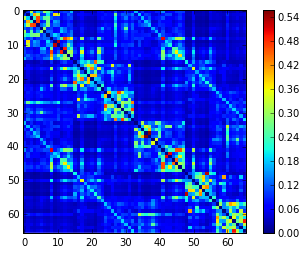

In [39]:
im = plt.imshow(SC, interpolation='none')
plt.colorbar(im)
plt.show()

In [40]:
ids = resortIds['resortIds'].squeeze()
ids = ids.copy()-1
ids = np.arange(66)

# reverse the other hemisphere so that it is symmetric
ids[33:66] = ids.copy()[66:32:-1]

# rotate the circle by 90 degree:
idsRotated = np.concatenate([ids[49:], ids[:49]])

namesSorted = []
for j in ids:
    namesSorted.append(unicode(str(labelsPresorted[j][0][0])))    

namesSortedRotated = []
for j in idsRotated:
    namesSortedRotated.append(unicode(str(labelsPresorted[j][0][0])))    

test = SC.copy()[ids,:]
SCsorted = test[:,ids].copy()

test = SC.copy()[idsRotated,:]
SCsortedRotated = test[:,idsRotated].copy()

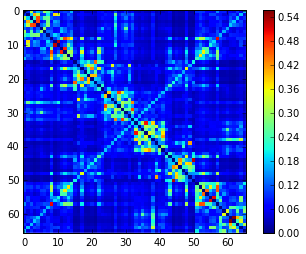

In [41]:
im = plt.imshow(SCsorted, interpolation='none')
plt.colorbar(im)
plt.show()

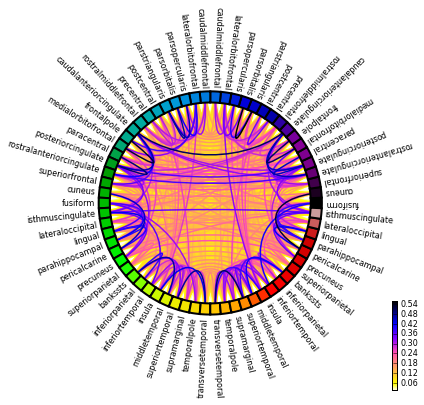

In [42]:
# (fig, ax) = mne.viz.plot_connectivity_circle(test2.transpose(),names,vmin=0.5,vmax=11,facecolor='white',textcolor='black',colormap='afmhot_r')
# fig.savefig('test.pdf')

#(fig, ax) = mne.viz.plot_connectivity_circle(SCsorted.transpose(),namesSorted,vmin=0.5,vmax=11,facecolor='white',textcolor='black',colormap='gnuplot2_r')
#fig.savefig('SC_sorted.pdf')

(fig, ax) = mne.viz.plot_connectivity_circle(SCsortedRotated.transpose(),namesSortedRotated,facecolor='white',textcolor='black',colormap='gnuplot2_r')
fig.savefig('SAR_FC_sorted_rotated.pdf')